# Desafio da Semana

Objetivo: Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula. 

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


Submeta uma pasta (Ex.: nome_sobrenome --> deborah_foroni) que contenha: 
- o arquivo .ipynb com sua análise exploratória;
- a base final criada por você no formato .csv;
- especificar quais bases da olist foram usadas;

# Coleta de Dados

A partir da base de dados da Olist foram selecionadas as seguintes tabelas a serem analisadas:
- detalhes do consumidor que fez os pedidos (olist_customers_dataset)
- pedidos (olist_orders_dataset)
- detalhes de pagamento dos pedidos (olist_order_payments_dataset)
- review dos usuários sobre os pedidos (olist_order_reviews_dataset)
- itens dos pedidos (olist_order_items_dataset)
- detalhes dos vendedores (olist_sellers_dataset)

In [399]:
import pandas as pd

In [400]:
df_clientes = pd.read_csv('datasets_olist_casa/olist_customers_dataset.csv')
df_clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Para a tabela de cliente serão utilizadas as seguintes colunas:

- **custumer_id**: identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de pedido.
- **custumer_city**: cidade do cliente.
- **custumer_state**: estado do cliente.

In [401]:
df_pedidos = pd.read_csv('datasets_olist_casa/olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Para a tabela de pedido serão utilizadas as seguintes colunas:

- **order_id**: identificador do pedido. Essa coluna é importante pois será a nossa chave com a tabela de pagamento.
- **order_status**: status do pedido.



In [402]:
df_pagamentos = pd.read_csv('datasets_olist_casa/olist_order_payments_dataset.csv')
df_pagamentos

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Para a tabela de pagamento serão utilizadas as seguintes colunas:

- **order_id**: identificador do pedido. Essa coluna é importante pois será a nossa chave com a tabela de itens e reviews do pedido.
- **payment_type**: modo de pagamento.
- **payment_value**: valor do  pagamento.

In [403]:
df_reviews = pd.read_csv('datasets_olist_casa/olist_order_reviews_dataset.csv')
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Para a tabela de reviews serão utilizadas as seguintes colunas:

- **order_id**: identificador do pedido. Essa coluna é importante pois será a nossa chave com a tabela de itens e pagamento.
- **reviws_score**: nota do feedback.

In [404]:
df_itens = pd.read_csv('datasets_olist_casa/olist_order_items_dataset.csv')
df_itens

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Para a tabela de itens serão utilizadas as seguintes colunas:

- **order_id**: identificador do pedido. Essa coluna é importante pois será a nossa chave com a tabela de pagamento e reviews do pedido.
- **order_id_item**: identificador do pedido.
- **product_id**: identificador do produto.
- **seller_id**: Identificador do vendedor. Essa coluna é importante pois será a nossa chave com a tabela de vendedor.
- **price**: valor do pedido.
- **freight_value**: valor do frete.

In [405]:
df_vendedores = pd.read_csv('datasets_olist_casa/olist_sellers_dataset.csv')
df_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Para a tabela de vendedores serão utilizadas as seguintes colunas:

- **seller_id**: identificador do vendedor. Essa coluna é importante pois será a nossa chave com a tabela de itens do pedido.
- **zip_code**: CEP do vendedor.
- **seller_city**: cidade  do vendedor.
- **seller_state**: estado do vendedor.

# Objetivo da nossa Análise Exploratória:

Perguntas a serem respondidas:

- Em quais cidades há maior concentração de vendedores? É nesta cidade que há o maior número de vendas?
- Nas cidades com maior número de vendas, qual é a forma de pagamento mais utilizada pelos consumidores?
- Quais cidades tem os maiores índices de vendas não finalizadas?
- Quais são as notas dos produtos por meio dos feedbacks dos consumidores, nas principais cidades de vendas?

# Limpando os dados da Olist

# Clientes

In [406]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [407]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['customer_unique_id','customer_zip_code_prefix']
df_clientes = df_clientes.drop(columns_drop, axis=1)
df_clientes

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


# Pedidos

In [408]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [409]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered


# Pagamentos

In [410]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [411]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['payment_sequential','payment_installments']
df_pagamentos = df_pagamentos.drop(columns_drop, axis=1)
df_pagamentos

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54


# Reviews

In [412]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [413]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp']
df_reviews = df_reviews.drop(columns_drop, axis=1)
df_reviews

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


In [414]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99224 non-null  object
 1   review_score  99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# Itens do Pedido

In [415]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [416]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['shipping_limit_date']
df_itens = df_itens.drop(columns_drop, axis=1)
df_itens

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


# Vendedores

In [417]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [418]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['seller_zip_code_prefix']
df_vendedores = df_vendedores.drop(columns_drop, axis=1)
df_vendedores

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS


## Juntando os datasets

In [419]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df_clientes e df_pedidos
df_olist = pd.merge(df_clientes, df_pedidos, on='customer_id')
df_olist

,customer_id,customer_city,customer_state,order_id,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered


In [420]:
# Jutando agora com os dados de df_pagamentos
df_olist = pd.merge(df_olist, df_pagamentos, on='order_id')
df_olist

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,credit_card,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25
...,...,...,...,...,...,...,...
103881,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,credit_card,88.78
103882,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,credit_card,129.06
103883,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,credit_card,56.04
103884,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,credit_card,711.07


In [421]:
# Jutando com os dados de df_reviews
df_olist = pd.merge(df_olist, df_reviews, on='order_id')
df_olist

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,4
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,credit_card,335.48,5
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25,5
...,...,...,...,...,...,...,...,...
103672,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,credit_card,88.78,4
103673,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,credit_card,129.06,5
103674,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,credit_card,56.04,1
103675,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,credit_card,711.07,5


In [422]:
# Jutando com os dados de df_itens
df_olist = pd.merge(df_olist, df_itens, on='order_id')
df_olist

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,credit_card,335.48,5,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,5,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25,5,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,credit_card,88.78,4,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88
117325,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,credit_card,129.06,5,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16
117326,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,credit_card,56.04,1,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04
117327,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,credit_card,711.07,5,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07


In [423]:
# Jutando com os dados de df_vendedores
df_olist = pd.merge(df_olist, df_vendedores, on='seller_id')
df_olist

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,itaquaquecetuba,SP
1,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
2,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,5,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,itaquaquecetuba,SP
3,4c06b42fbf7b97ab10779cda5549cd1c,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,delivered,credit_card,315.75,1,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,itaquaquecetuba,SP
4,8276de07ef25225d412b8462d73f8664,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,delivered,boleto,146.21,4,1,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,jordania,MG,b494f624c631105b24fe497277085909,delivered,credit_card,72.18,5,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,49.90,22.28,maringa,PR
117325,f0f671d4034e98cdf20f0c452d6db02b,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,credit_card,775.98,3,1,5ece1e51ece4648de249ec6e9d007fd6,da4d149c0ddbac90557103ac0a0ec356,730.00,45.98,sbc,SP
117326,b90b857a277b080d8078332b3636ab58,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,delivered,credit_card,224.44,5,1,d6e7ac236e583af1e1543d8068c91676,377bc18334c78dd2f1535ef22a3ad225,135.98,88.46,sao jose dos pinhais,PR
117327,1ed0c832c2dd99570a59260e71768bdf,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,credit_card,167.79,1,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,167.99,31.93,braganca paulista,SP


In [424]:
# Exportando a base final
df_olist.to_csv('base_final_olist.csv', index=False)

# Analisando os dados

Perguntas a serem respondidas:

- Em quais cidades há maior concentração de vendedores? É nesta cidade que há o maior número de vendas?
- Nas cidades com maior número de vendas, qual é a forma de pagamento mais utilizada pelos consumidores? O preço da compra tem relevância?
- Quais estados tem os maiores índices de vendas não finalizadas?
- Quais são as notas dos produtos por meio dos feedbacks dos consumidores?

### Em quais cidades há maior concentração de vendedores? É nesta cidade que há o maior número de vendas?

In [425]:
# Quais sao as cidades com o maior número de vendedores em valor absoluto
df_quantvendedor = df_olist["seller_city"].value_counts().head(5)
df_quantvendedor

seller_city
sao paulo                29048
ibitinga                  8271
curitiba                  3144
santo andre               3134
sao jose do rio preto     2673
Name: count, dtype: int64

In [426]:
# Quais sao as cidades com o maior número de vendedores em percentual
df_quantvendedor_perc = df_olist["seller_city"].value_counts(normalize=True).head(5)
df_quantvendedor_perc

seller_city
sao paulo                0.247577
ibitinga                 0.070494
curitiba                 0.026796
santo andre              0.026711
sao jose do rio preto    0.022782
Name: proportion, dtype: float64

In [427]:
# filtrando apenas as cidades com o maior número de vendedores
df_quantvendedor = df_olist.loc[(df_olist['seller_city'] == 'sao paulo')|(df_olist['seller_city'] == 'ibitinga')|(df_olist['seller_city'] == 'curitiba')|(df_olist['seller_city'] == 'santo andre')|(df_olist['seller_city'] == 'sao jose do rio preto')]
df_quantvendedor

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
1501,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25,5,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,ibitinga,SP
1502,cb721d7b4f271fd87011c4c83462c076,sao paulo,SP,6cdc131d3c28253cd03cd0fbc3d5f938,delivered,credit_card,80.11,4,1,777d2e438a1b645f3aec9bd57e92672c,4a3ca9315b744ce9f8e9374361493884,69.90,10.21,ibitinga,SP
1503,df85b96ba2ce3e49bde101b1614f52ac,sao jose dos pinhais,PR,d13130a0433949ba242b2f0632fd49a2,delivered,credit_card,171.32,5,1,48f866f20b5b6015a324210988e73387,4a3ca9315b744ce9f8e9374361493884,153.00,18.32,ibitinga,SP
1504,89056b2877a2be69b4e9c9d7ebc3ae5d,vargem grande,MA,28102fcf855de00539e3b6ab0920648b,delivered,credit_card,137.01,5,1,64fb265487de2238627ce43fe8a67efc,4a3ca9315b744ce9f8e9374361493884,79.90,57.11,ibitinga,SP
1505,94cce5d77423fc7926d3af0d01f379ef,macae,RJ,573aed3067e4c429716880094b71a80b,delivered,credit_card,104.70,5,1,5e939a93f81b2b628f2c09510001742a,4a3ca9315b744ce9f8e9374361493884,89.90,14.80,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117303,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,3,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
117304,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,4,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
117305,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,5,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
117319,294224ab77ae8aaa31754ec26833ad8e,porto velho,RO,9e6e27636992efb64ea41832caa1ecd2,delivered,credit_card,205.65,5,1,e7d74ac41522f4ecd8782803fafc8aca,d9c349beabc06aa6ff1c6d68b5e9e22e,168.10,37.55,sao paulo,SP


In [428]:
# Ao filtrar apenas as cidades com o maior número de vendedores, dados foram excluídos. Então, é preciso resetar o index do dataset:
df_quantvendedor = df_quantvendedor.reset_index(drop=True)
df_quantvendedor

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25,5,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,ibitinga,SP
1,cb721d7b4f271fd87011c4c83462c076,sao paulo,SP,6cdc131d3c28253cd03cd0fbc3d5f938,delivered,credit_card,80.11,4,1,777d2e438a1b645f3aec9bd57e92672c,4a3ca9315b744ce9f8e9374361493884,69.90,10.21,ibitinga,SP
2,df85b96ba2ce3e49bde101b1614f52ac,sao jose dos pinhais,PR,d13130a0433949ba242b2f0632fd49a2,delivered,credit_card,171.32,5,1,48f866f20b5b6015a324210988e73387,4a3ca9315b744ce9f8e9374361493884,153.00,18.32,ibitinga,SP
3,89056b2877a2be69b4e9c9d7ebc3ae5d,vargem grande,MA,28102fcf855de00539e3b6ab0920648b,delivered,credit_card,137.01,5,1,64fb265487de2238627ce43fe8a67efc,4a3ca9315b744ce9f8e9374361493884,79.90,57.11,ibitinga,SP
4,94cce5d77423fc7926d3af0d01f379ef,macae,RJ,573aed3067e4c429716880094b71a80b,delivered,credit_card,104.70,5,1,5e939a93f81b2b628f2c09510001742a,4a3ca9315b744ce9f8e9374361493884,89.90,14.80,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46265,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,3,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
46266,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,4,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
46267,f48c503766cc6385fe6947e623c20b65,porto alegre,RS,b13efaac3f8cb7730ba737059abc614b,delivered,credit_card,107.75,1,5,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,7.45,14.10,sao paulo,SP
46268,294224ab77ae8aaa31754ec26833ad8e,porto velho,RO,9e6e27636992efb64ea41832caa1ecd2,delivered,credit_card,205.65,5,1,e7d74ac41522f4ecd8782803fafc8aca,d9c349beabc06aa6ff1c6d68b5e9e22e,168.10,37.55,sao paulo,SP


In [429]:
# Todos os status disponíveis que há na base
df_olist['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'canceled', 'processing',
       'unavailable', 'approved'], dtype=object)

In [430]:
# filtrando apenas os pedidos que foram finalizados
df_pedidosfinalizados = df_olist.loc[(df_olist['order_status'] == 'delivered')|(df_olist['order_status'] == 'shipped')|(df_olist['order_status'] == 'approved')]
df_pedidosfinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,itaquaquecetuba,SP
1,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
2,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,5,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,itaquaquecetuba,SP
3,4c06b42fbf7b97ab10779cda5549cd1c,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,delivered,credit_card,315.75,1,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,itaquaquecetuba,SP
4,8276de07ef25225d412b8462d73f8664,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,delivered,boleto,146.21,4,1,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,jordania,MG,b494f624c631105b24fe497277085909,delivered,credit_card,72.18,5,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,49.90,22.28,maringa,PR
117325,f0f671d4034e98cdf20f0c452d6db02b,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,credit_card,775.98,3,1,5ece1e51ece4648de249ec6e9d007fd6,da4d149c0ddbac90557103ac0a0ec356,730.00,45.98,sbc,SP
117326,b90b857a277b080d8078332b3636ab58,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,delivered,credit_card,224.44,5,1,d6e7ac236e583af1e1543d8068c91676,377bc18334c78dd2f1535ef22a3ad225,135.98,88.46,sao jose dos pinhais,PR
117327,1ed0c832c2dd99570a59260e71768bdf,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,credit_card,167.79,1,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,167.99,31.93,braganca paulista,SP


In [431]:
# Ao filtrar somente pedidos finalizados, dados foram excluídos. Então, é preciso resetar o index do dataset:
df_pedidosfinalizados = df_pedidosfinalizados.reset_index(drop=True)
df_pedidosfinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,itaquaquecetuba,SP
1,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
2,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,5,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,itaquaquecetuba,SP
3,4c06b42fbf7b97ab10779cda5549cd1c,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,delivered,credit_card,315.75,1,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,itaquaquecetuba,SP
4,8276de07ef25225d412b8462d73f8664,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,delivered,boleto,146.21,4,1,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116024,eda10d7eb51a675d000956fa1aabc7dd,jordania,MG,b494f624c631105b24fe497277085909,delivered,credit_card,72.18,5,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,49.90,22.28,maringa,PR
116025,f0f671d4034e98cdf20f0c452d6db02b,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,credit_card,775.98,3,1,5ece1e51ece4648de249ec6e9d007fd6,da4d149c0ddbac90557103ac0a0ec356,730.00,45.98,sbc,SP
116026,b90b857a277b080d8078332b3636ab58,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,delivered,credit_card,224.44,5,1,d6e7ac236e583af1e1543d8068c91676,377bc18334c78dd2f1535ef22a3ad225,135.98,88.46,sao jose dos pinhais,PR
116027,1ed0c832c2dd99570a59260e71768bdf,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,credit_card,167.79,1,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,167.99,31.93,braganca paulista,SP


In [432]:
# Quais sao as cidades com maior quantidade de clientes em valor absoluto
df_quantcliente = df_olist['customer_city'].value_counts().head(5)
df_quantcliente

customer_city
sao paulo         18582
rio de janeiro     8158
belo horizonte     3252
brasilia           2466
curitiba           1807
Name: count, dtype: int64

In [433]:
# Quais sao as cidades com o maior número de clientes em percentual
df_quantcliente_perc = df_olist["customer_city"].value_counts(normalize=True).head(5)
df_quantcliente_perc

customer_city
sao paulo         0.158375
rio de janeiro    0.069531
belo horizonte    0.027717
brasilia          0.021018
curitiba          0.015401
Name: proportion, dtype: float64

In [434]:
# filtrandoas cidades com o maior número de clientes
df_quantcliente = df_olist.loc[(df_olist['customer_city'] == 'sao paulo')|(df_olist['customer_city'] == 'rio de janeiro')|(df_olist['customer_city'] == 'belo horizonte')|(df_olist['customer_city'] == 'brasilia')|(df_olist['customer_city'] == 'curitiba')]
df_quantcliente

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
1,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
6,d703cdda08125e2b263b92746af0f23c,sao paulo,SP,5aadbda0877e0d99ba07f785cd29c362,delivered,credit_card,156.73,4,1,c56400aa5823575d5a92a8f98077490a,7c67e1448b00f6e969d365cea6b010ab,137.99,18.74,itaquaquecetuba,SP
7,03f7c28100418ce57927a01d62a6cdf3,rio de janeiro,RJ,3f695ee2567af0b169e482d825ec8e31,delivered,boleto,118.46,2,1,914c9e9af640dd56f48764a225b00f89,7c67e1448b00f6e969d365cea6b010ab,78.98,39.48,itaquaquecetuba,SP
11,fc570b6557c9a63780acb28007d313f0,sao paulo,SP,a24d08cc90fa49d3bb3be98d915423e3,delivered,credit_card,158.68,4,1,dbf47a585df3a9d8f0b5f4c125a2b8e8,7c67e1448b00f6e969d365cea6b010ab,139.99,18.69,itaquaquecetuba,SP
12,07cbe547b6dec2535abda65b57733754,sao paulo,SP,7741a0c0ccbb42c74fb27c570c7e5354,delivered,credit_card,108.32,5,1,0a9bdadab17a9b0f258f64d11a0adf7b,7c67e1448b00f6e969d365cea6b010ab,89.98,18.34,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117288,bace683427e40bae08e7af13660e1436,rio de janeiro,RJ,1b2a8a35effe3c031684be53784ac90c,delivered,voucher,423.96,5,1,2befa4541c8bf3f4c76ebbed873f628f,32e5635e63cb374eb63afdd242fb6134,910.00,17.82,rio de janeiro,RJ
117294,9d151c7612fd140ebcafd620491a17b3,rio de janeiro,RJ,a65d4ac927fef29da1b58e60ebdbb1d7,delivered,boleto,412.12,5,1,d34984353fa530831479ab9686c090e7,24c1de8d9551c0b4fbc53317d53efda8,355.00,57.12,serra redonda,PB
117300,5b3fcd569a769e5b39b539e0ffdbf84d,rio de janeiro,RJ,546217c016be73136e22021e4d63985f,delivered,credit_card,42.00,5,1,a133d679c63597e416572ee64d9d6436,d4a5e99e0dd915df64ba55a7fbd583fd,27.90,14.10,sao paulo,SP
117313,01415cfeb907d8ce0e17075b4c097fe9,sao paulo,SP,0ec61157a488963fe217233f74c52760,delivered,credit_card,45.01,4,1,895fc53d66ecb6c1afc40138dbc2a73c,c43d924a0f1688ee9fae0efcd6f539d4,29.90,15.11,rio de janeiro,RJ


In [435]:
# Ao filtrar apenas as cidades com o maior número de clientes, dados foram excluídos. Então, é preciso resetar o index do dataset:
df_quantcliente = df_quantcliente.reset_index(drop=True)
df_quantcliente

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
1,d703cdda08125e2b263b92746af0f23c,sao paulo,SP,5aadbda0877e0d99ba07f785cd29c362,delivered,credit_card,156.73,4,1,c56400aa5823575d5a92a8f98077490a,7c67e1448b00f6e969d365cea6b010ab,137.99,18.74,itaquaquecetuba,SP
2,03f7c28100418ce57927a01d62a6cdf3,rio de janeiro,RJ,3f695ee2567af0b169e482d825ec8e31,delivered,boleto,118.46,2,1,914c9e9af640dd56f48764a225b00f89,7c67e1448b00f6e969d365cea6b010ab,78.98,39.48,itaquaquecetuba,SP
3,fc570b6557c9a63780acb28007d313f0,sao paulo,SP,a24d08cc90fa49d3bb3be98d915423e3,delivered,credit_card,158.68,4,1,dbf47a585df3a9d8f0b5f4c125a2b8e8,7c67e1448b00f6e969d365cea6b010ab,139.99,18.69,itaquaquecetuba,SP
4,07cbe547b6dec2535abda65b57733754,sao paulo,SP,7741a0c0ccbb42c74fb27c570c7e5354,delivered,credit_card,108.32,5,1,0a9bdadab17a9b0f258f64d11a0adf7b,7c67e1448b00f6e969d365cea6b010ab,89.98,18.34,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34260,bace683427e40bae08e7af13660e1436,rio de janeiro,RJ,1b2a8a35effe3c031684be53784ac90c,delivered,voucher,423.96,5,1,2befa4541c8bf3f4c76ebbed873f628f,32e5635e63cb374eb63afdd242fb6134,910.00,17.82,rio de janeiro,RJ
34261,9d151c7612fd140ebcafd620491a17b3,rio de janeiro,RJ,a65d4ac927fef29da1b58e60ebdbb1d7,delivered,boleto,412.12,5,1,d34984353fa530831479ab9686c090e7,24c1de8d9551c0b4fbc53317d53efda8,355.00,57.12,serra redonda,PB
34262,5b3fcd569a769e5b39b539e0ffdbf84d,rio de janeiro,RJ,546217c016be73136e22021e4d63985f,delivered,credit_card,42.00,5,1,a133d679c63597e416572ee64d9d6436,d4a5e99e0dd915df64ba55a7fbd583fd,27.90,14.10,sao paulo,SP
34263,01415cfeb907d8ce0e17075b4c097fe9,sao paulo,SP,0ec61157a488963fe217233f74c52760,delivered,credit_card,45.01,4,1,895fc53d66ecb6c1afc40138dbc2a73c,c43d924a0f1688ee9fae0efcd6f539d4,29.90,15.11,rio de janeiro,RJ


As 5 cidades com maior número de vendedores são:
- São Paulo com 29048 vendedores;
- Ibitinga com 8271 vendedores;
- Curitiba com 3144 vendedores;
- Santo Ándre com 3134 vendedores;
- São José do Rio Preto com 2673 vendedores.

As 5 cidades com maior número de clientes são:
- São Paulo com 18582 clientes;
- Rio de Janeiro com 8158 clientes;
- Belo Horizonte com 3252 clientes;
- Brasília com 2466 clientes;
- Curitiba com 1807 clientes.

Portanto, a relação de vendedores e vendas não é tão direta desta pespectiva, pois estamos falando de cidades. São Paulo como grande metropóle faz sentido ser destaque em ambos os casos. No entato, é possível observar que parte das cidades tanto do vendedor, quanto dos clientes que finalizaran as compras estão no mesmo estado, ou seja, mesmo não tendo relação direta entre cidades, há em relação ao estado que estão localizadas.

### Nas cidades com maior número de vendas, qual é a forma de pagamento mais utilizada pelos consumidores?

In [436]:
# cidades com maior quantidade de vendas por tipo de pagamento em valor absoluto
df_formapag = df_quantcliente['payment_type'].value_counts()
df_formapag

payment_type
credit_card    25876
boleto          5998
voucher         1833
debit_card       558
Name: count, dtype: int64

In [437]:
# cidades com maior quantidade de vendas por tipo de pagamento em percentual
df_formapag_perc = df_quantcliente['payment_type'].value_counts(normalize=True)
df_formapag_perc

payment_type
credit_card    0.755173
boleto         0.175047
voucher        0.053495
debit_card     0.016285
Name: proportion, dtype: float64

In [438]:
# Filtragem das colunas que serão utilizadas
columns_drop = ['customer_id','customer_state','order_id','order_status','review_score','order_item_id','product_id','seller_id','price', 'freight_value','seller_city','seller_state']
df_formapag = df_quantcliente.drop(columns_drop, axis=1)
df_formapag

,customer_city,payment_type,payment_value
0,sao paulo,credit_card,157.73
1,sao paulo,credit_card,156.73
2,rio de janeiro,boleto,118.46
3,sao paulo,credit_card,158.68
4,sao paulo,credit_card,108.32
...,...,...,...
34260,rio de janeiro,voucher,423.96
34261,rio de janeiro,boleto,412.12
34262,rio de janeiro,credit_card,42.00
34263,sao paulo,credit_card,45.01


De acordo com as cidades com mais vendas, as formas de pagamento mais utilizadas são:
- Cartão de Crédito com 25876 vendas;
- Boleto com 5998 vendas;
- Voucher com 1833 vendas;
- Cartão de Débito com 558 vendas.

### Quais cidades tem os maiores índices de vendas não finalizadas?

In [439]:
# filtrando apenas os pedidos que não foram finalizados
df_pedidosnaofinalizados = df_olist.loc[(df_olist['order_status'] == 'unavailable')|(df_olist['order_status'] == 'canceled')]
df_pedidosnaofinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
3556,078c6672babf4cf39a551e2dcd79229e,sao paulo,SP,f3c5d914eec90079a826c2b5ea7fe6bc,canceled,credit_card,72.66,1,1,4f130a13e2dd77a6f88f31e7addcec0c,4a3ca9315b744ce9f8e9374361493884,59.90,12.76,ibitinga,SP
3620,a10afcc34f66a704819e459a8f524ffa,campos gerais,MG,8d171a848151e69e8f090fdbb50d4010,canceled,boleto,108.00,5,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,86.90,21.10,ibitinga,SP
4868,b279a1d441c73c1974d7a63618855aa0,rio de janeiro,RJ,13bdf405f961a6deec817d817f5c6624,canceled,boleto,84.65,1,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,69.99,14.66,jacutinga,MG
5500,c2ca5f569938a5f8a79e1f80f3800e3f,sao paulo,SP,7e30f6ae5435d7c05b487f7b5e1d61ba,canceled,credit_card,37.77,1,1,419cb1b441eda9b92ebd1a1b96090c26,ea8482cd71df3c1969d7b9473ff13abc,29.99,7.78,sao paulo,SP
6690,0f29ccaad86ee7442d59a69cf4166c6b,nhandeara,SP,8652f7789fe1585b439154b7ae0f4285,canceled,credit_card,46.85,1,1,054515fd15bc1a2029f10de97ffa9120,e9779976487b77c6d4ac45f75ec7afe9,35.00,11.85,praia grande,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117232,1d19f123d715d31a525094a81bbea5ef,curitiba,PR,5e30dcb2e114da32afe2f0942750616a,canceled,credit_card,327.39,1,1,20dce72985857d1c8d09d506a8ec5187,e46bc031f2c5bae4ccb40bb90712e9b4,277.30,50.09,sao paulo,SP
117247,a7e8a3cb55d9c9a536992c6465a46a3f,santana de parnaiba,SP,00ae7a8b4936674ebb701d4a23719a79,canceled,credit_card,37.16,2,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,27.90,9.26,piracicaba,SP
117292,5c5b874cbcfdabe3f6cd0e3494a0ec34,sao vicente,SP,f7dca277a6bb273200598f0e36319d94,canceled,boleto,68.04,2,1,ad30079acfcea22be08f603414dbc0fe,2078fe5066350e7d220c0ad3a3bbc6c1,29.90,38.14,arapongas,PR
117320,0496b71ebc90246e3e2ed28846651580,sao paulo,SP,93aa3d58f7f2a97010801f8ff8dc45a5,canceled,boleto,121.67,1,1,f7e2c966e1db5f57d218c530464c38da,92992bec39dde5766f590d3b1f46d465,109.00,12.67,sao paulo,SP


In [440]:
# Ao filtrar somente pedidos não finalizados, dados foram excluídos. Então, é preciso resetar o index do dataset:
df_pedidosnaofinalizados = df_pedidosnaofinalizados.reset_index(drop=True)
df_pedidosnaofinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,078c6672babf4cf39a551e2dcd79229e,sao paulo,SP,f3c5d914eec90079a826c2b5ea7fe6bc,canceled,credit_card,72.66,1,1,4f130a13e2dd77a6f88f31e7addcec0c,4a3ca9315b744ce9f8e9374361493884,59.90,12.76,ibitinga,SP
1,a10afcc34f66a704819e459a8f524ffa,campos gerais,MG,8d171a848151e69e8f090fdbb50d4010,canceled,boleto,108.00,5,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,86.90,21.10,ibitinga,SP
2,b279a1d441c73c1974d7a63618855aa0,rio de janeiro,RJ,13bdf405f961a6deec817d817f5c6624,canceled,boleto,84.65,1,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,69.99,14.66,jacutinga,MG
3,c2ca5f569938a5f8a79e1f80f3800e3f,sao paulo,SP,7e30f6ae5435d7c05b487f7b5e1d61ba,canceled,credit_card,37.77,1,1,419cb1b441eda9b92ebd1a1b96090c26,ea8482cd71df3c1969d7b9473ff13abc,29.99,7.78,sao paulo,SP
4,0f29ccaad86ee7442d59a69cf4166c6b,nhandeara,SP,8652f7789fe1585b439154b7ae0f4285,canceled,credit_card,46.85,1,1,054515fd15bc1a2029f10de97ffa9120,e9779976487b77c6d4ac45f75ec7afe9,35.00,11.85,praia grande,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1d19f123d715d31a525094a81bbea5ef,curitiba,PR,5e30dcb2e114da32afe2f0942750616a,canceled,credit_card,327.39,1,1,20dce72985857d1c8d09d506a8ec5187,e46bc031f2c5bae4ccb40bb90712e9b4,277.30,50.09,sao paulo,SP
556,a7e8a3cb55d9c9a536992c6465a46a3f,santana de parnaiba,SP,00ae7a8b4936674ebb701d4a23719a79,canceled,credit_card,37.16,2,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,27.90,9.26,piracicaba,SP
557,5c5b874cbcfdabe3f6cd0e3494a0ec34,sao vicente,SP,f7dca277a6bb273200598f0e36319d94,canceled,boleto,68.04,2,1,ad30079acfcea22be08f603414dbc0fe,2078fe5066350e7d220c0ad3a3bbc6c1,29.90,38.14,arapongas,PR
558,0496b71ebc90246e3e2ed28846651580,sao paulo,SP,93aa3d58f7f2a97010801f8ff8dc45a5,canceled,boleto,121.67,1,1,f7e2c966e1db5f57d218c530464c38da,92992bec39dde5766f590d3b1f46d465,109.00,12.67,sao paulo,SP


In [441]:
# estados com maior quantidade de pedidos não finalizados em valor absoluto
df_pedidosnaofinalizadosabs = df_pedidosnaofinalizados['customer_city'].value_counts().head(5)
df_pedidosnaofinalizadosabs

customer_city
sao paulo         142
rio de janeiro     32
belo horizonte     14
guarulhos          12
campinas           10
Name: count, dtype: int64

In [442]:
# estados com maior quantidade de pedidos não finalizados em percentual
df_pedidosnaofinalizados_perc = df_pedidosnaofinalizados['customer_city'].value_counts(normalize=True).head(5)
df_pedidosnaofinalizados_perc

customer_city
sao paulo         0.253571
rio de janeiro    0.057143
belo horizonte    0.025000
guarulhos         0.021429
campinas          0.017857
Name: proportion, dtype: float64

In [452]:
# filtrandoas cidades com o maior número de pedidos não finalizados
df_pedidosnaofinalizados = df_pedidosnaofinalizados.loc[(df_pedidosnaofinalizados['customer_city'] == 'sao paulo')|(df_pedidosnaofinalizados['customer_city'] == 'rio de janeiro')|(df_pedidosnaofinalizados['customer_city'] == 'belo horizonte')|(df_pedidosnaofinalizados['customer_city'] == 'guarulhos')|(df_pedidosnaofinalizados['customer_city'] == 'campinas')]
df_pedidosnaofinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
12,704e2db282206eaf28d686a1482fb224,guarulhos,SP,765917871914309e5c5f9ed151155ad4,canceled,credit_card,62.78,1,1,aa8d88eb4b9cb38894e33fa624c4287f,6560211a19b47992c3666cc44a7e94c0,55.00,7.78,sao paulo,SP
25,c68c27e929bf3a5f6d15d6101a7bd890,sao paulo,SP,5687ad45d33870c742b2cdacaf758353,canceled,credit_card,69.14,1,1,1b43b0a6105ffaa6dae01356daec2657,cc419e0650a3c5ba77189a1882b7556a,57.99,11.15,santo andre,SP
32,44be08be1465706be7a032d9e563d9f5,rio de janeiro,RJ,7ea0cd46b9a8fbf664e537374947787c,canceled,credit_card,86.73,1,1,177d3d5bb9d4d29222a222e3b3554f41,3d871de0142ce09b7081e2b9d1733cb1,69.00,17.73,campo limpo paulista,SP
47,2cb9cd4d83c7018f46ff002953f95901,rio de janeiro,RJ,be3b8d058b8100d8a2539ce0b2c6ec0b,canceled,credit_card,1223.06,2,1,20332c1e41e427864b3561a657caaf0d,fa1c13f2614d7b5c4749cbc52fecda94,1199.90,23.16,sumare,SP
51,2e086d3b6cceaa2d572fd61882927b96,sao paulo,SP,a9bfa6ed984d0688f6e53d537d9f69b0,canceled,boleto,35.77,3,1,243bb58796ed2164b831fb75e1241888,2138ccb85b11a4ec1e37afbd1c8eda1f,27.99,7.78,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,8210d932dc0ae881df69bc694b290b7c,campinas,SP,113e41a438f06ffae6d1857e01d60c45,canceled,boleto,127.12,1,4,59c6d60f81179f563785a48de25532b9,bcf5566870987da7bc811fbc8c5b9fd9,24.00,7.78,sao paulo,SP
535,8f9a7227b5626fdf0b401e8832446f84,guarulhos,SP,1046c724dec8bc31545703d07c378073,canceled,voucher,25.00,1,1,389c7d7f59a980be2afbe84d648cd80f,e3e15e2c0b9700561efac21c6be48066,23.99,7.43,sao paulo,SP
536,8f9a7227b5626fdf0b401e8832446f84,guarulhos,SP,1046c724dec8bc31545703d07c378073,canceled,credit_card,6.42,1,1,389c7d7f59a980be2afbe84d648cd80f,e3e15e2c0b9700561efac21c6be48066,23.99,7.43,sao paulo,SP
551,9ef41f3330353f05ce6354673a4bd045,rio de janeiro,RJ,ac7431b880a4ca43d70096a6dfa49071,canceled,boleto,47.00,1,1,db7519522818a6db0f264d6b4a16c40e,87f3e35268860433e13d577825aada95,31.90,15.10,bom jesus dos perdoes,SP


In [453]:
# Ao filtrar apenas as cidades com o maior número de pedidos não finalizados, dados foram excluídos. Então, é preciso resetar o index do dataset:
df_pedidosnaofinalizados = df_pedidosnaofinalizados.reset_index(drop=True)
df_pedidosnaofinalizados

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,704e2db282206eaf28d686a1482fb224,guarulhos,SP,765917871914309e5c5f9ed151155ad4,canceled,credit_card,62.78,1,1,aa8d88eb4b9cb38894e33fa624c4287f,6560211a19b47992c3666cc44a7e94c0,55.00,7.78,sao paulo,SP
1,c68c27e929bf3a5f6d15d6101a7bd890,sao paulo,SP,5687ad45d33870c742b2cdacaf758353,canceled,credit_card,69.14,1,1,1b43b0a6105ffaa6dae01356daec2657,cc419e0650a3c5ba77189a1882b7556a,57.99,11.15,santo andre,SP
2,44be08be1465706be7a032d9e563d9f5,rio de janeiro,RJ,7ea0cd46b9a8fbf664e537374947787c,canceled,credit_card,86.73,1,1,177d3d5bb9d4d29222a222e3b3554f41,3d871de0142ce09b7081e2b9d1733cb1,69.00,17.73,campo limpo paulista,SP
3,2cb9cd4d83c7018f46ff002953f95901,rio de janeiro,RJ,be3b8d058b8100d8a2539ce0b2c6ec0b,canceled,credit_card,1223.06,2,1,20332c1e41e427864b3561a657caaf0d,fa1c13f2614d7b5c4749cbc52fecda94,1199.90,23.16,sumare,SP
4,2e086d3b6cceaa2d572fd61882927b96,sao paulo,SP,a9bfa6ed984d0688f6e53d537d9f69b0,canceled,boleto,35.77,3,1,243bb58796ed2164b831fb75e1241888,2138ccb85b11a4ec1e37afbd1c8eda1f,27.99,7.78,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,8210d932dc0ae881df69bc694b290b7c,campinas,SP,113e41a438f06ffae6d1857e01d60c45,canceled,boleto,127.12,1,4,59c6d60f81179f563785a48de25532b9,bcf5566870987da7bc811fbc8c5b9fd9,24.00,7.78,sao paulo,SP
77,8f9a7227b5626fdf0b401e8832446f84,guarulhos,SP,1046c724dec8bc31545703d07c378073,canceled,voucher,25.00,1,1,389c7d7f59a980be2afbe84d648cd80f,e3e15e2c0b9700561efac21c6be48066,23.99,7.43,sao paulo,SP
78,8f9a7227b5626fdf0b401e8832446f84,guarulhos,SP,1046c724dec8bc31545703d07c378073,canceled,credit_card,6.42,1,1,389c7d7f59a980be2afbe84d648cd80f,e3e15e2c0b9700561efac21c6be48066,23.99,7.43,sao paulo,SP
79,9ef41f3330353f05ce6354673a4bd045,rio de janeiro,RJ,ac7431b880a4ca43d70096a6dfa49071,canceled,boleto,47.00,1,1,db7519522818a6db0f264d6b4a16c40e,87f3e35268860433e13d577825aada95,31.90,15.10,bom jesus dos perdoes,SP


In [455]:
# formato de pagamento com maiores número de pedidos não finalizados em valor absoluto
df_formapagnaof = df_pedidosnaofinalizados['payment_type'].value_counts()
df_formapagnaof

payment_type
credit_card    54
boleto         19
voucher         7
debit_card      1
Name: count, dtype: int64

Analisando as informações captadas, há poucos cancelamentos, considerando o total de vendas finalizadas (116029) nas principais cidades consumidoras. E o formato que mais há falta de finalização de compra é o cartão de crédito, pode-se sugerir a falta de limite.

### Quais são as notas dos feedbacks dos consumidores, nas principais cidades de vendas?

In [462]:
df_quantcliente

,customer_id,customer_city,customer_state,order_id,order_status,payment_type,payment_value,review_score,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state
0,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP
1,d703cdda08125e2b263b92746af0f23c,sao paulo,SP,5aadbda0877e0d99ba07f785cd29c362,delivered,credit_card,156.73,4,1,c56400aa5823575d5a92a8f98077490a,7c67e1448b00f6e969d365cea6b010ab,137.99,18.74,itaquaquecetuba,SP
2,03f7c28100418ce57927a01d62a6cdf3,rio de janeiro,RJ,3f695ee2567af0b169e482d825ec8e31,delivered,boleto,118.46,2,1,914c9e9af640dd56f48764a225b00f89,7c67e1448b00f6e969d365cea6b010ab,78.98,39.48,itaquaquecetuba,SP
3,fc570b6557c9a63780acb28007d313f0,sao paulo,SP,a24d08cc90fa49d3bb3be98d915423e3,delivered,credit_card,158.68,4,1,dbf47a585df3a9d8f0b5f4c125a2b8e8,7c67e1448b00f6e969d365cea6b010ab,139.99,18.69,itaquaquecetuba,SP
4,07cbe547b6dec2535abda65b57733754,sao paulo,SP,7741a0c0ccbb42c74fb27c570c7e5354,delivered,credit_card,108.32,5,1,0a9bdadab17a9b0f258f64d11a0adf7b,7c67e1448b00f6e969d365cea6b010ab,89.98,18.34,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34260,bace683427e40bae08e7af13660e1436,rio de janeiro,RJ,1b2a8a35effe3c031684be53784ac90c,delivered,voucher,423.96,5,1,2befa4541c8bf3f4c76ebbed873f628f,32e5635e63cb374eb63afdd242fb6134,910.00,17.82,rio de janeiro,RJ
34261,9d151c7612fd140ebcafd620491a17b3,rio de janeiro,RJ,a65d4ac927fef29da1b58e60ebdbb1d7,delivered,boleto,412.12,5,1,d34984353fa530831479ab9686c090e7,24c1de8d9551c0b4fbc53317d53efda8,355.00,57.12,serra redonda,PB
34262,5b3fcd569a769e5b39b539e0ffdbf84d,rio de janeiro,RJ,546217c016be73136e22021e4d63985f,delivered,credit_card,42.00,5,1,a133d679c63597e416572ee64d9d6436,d4a5e99e0dd915df64ba55a7fbd583fd,27.90,14.10,sao paulo,SP
34263,01415cfeb907d8ce0e17075b4c097fe9,sao paulo,SP,0ec61157a488963fe217233f74c52760,delivered,credit_card,45.01,4,1,895fc53d66ecb6c1afc40138dbc2a73c,c43d924a0f1688ee9fae0efcd6f539d4,29.90,15.11,rio de janeiro,RJ


In [465]:
df_feedback = df_quantcliente['review_score'].value_counts()
df_feedback

review_score
5    19654
4     6250
1     4479
3     2745
2     1137
Name: count, dtype: int64

# Visualizações dos dados da Olist

In [443]:
# importando os pacotes que iremos utilizar
import matplotlib.pyplot as plt
import seaborn as sns

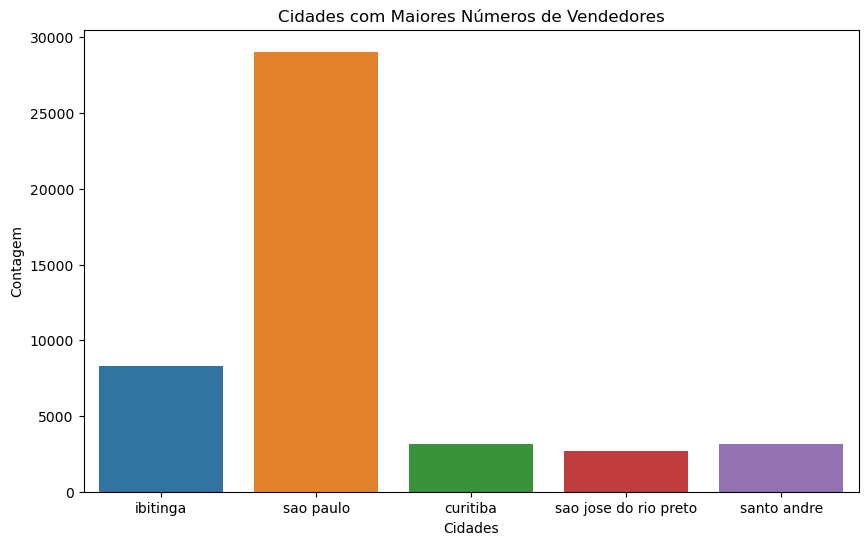

In [444]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias
sns.countplot(data = df_quantvendedor,
              x = 'seller_city')

# definir texto do título e eixos x e y
plt.title('Cidades com Maiores Números de Vendedores')
plt.xlabel('Cidades')
plt.ylabel('Contagem')
plt.show()

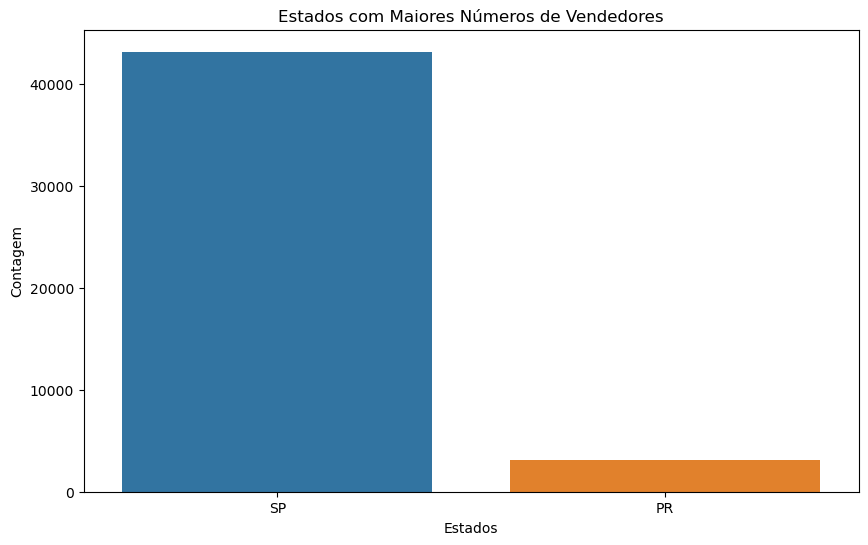

In [445]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias
sns.countplot(data = df_quantvendedor,
              x = 'seller_state')

# definir texto do título e eixos x e y
plt.title('Estados com Maiores Números de Vendedores')
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.show()

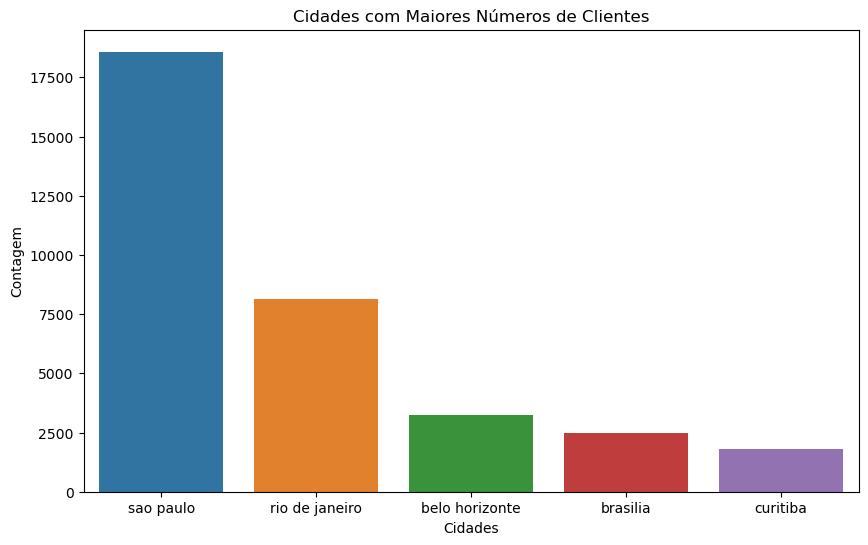

In [446]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias
sns.countplot(data = df_quantcliente,
              x = 'customer_city')

# definir texto do título e eixos x e y
plt.title('Cidades com Maiores Números de Clientes')
plt.xlabel('Cidades')
plt.ylabel('Contagem')
plt.show()

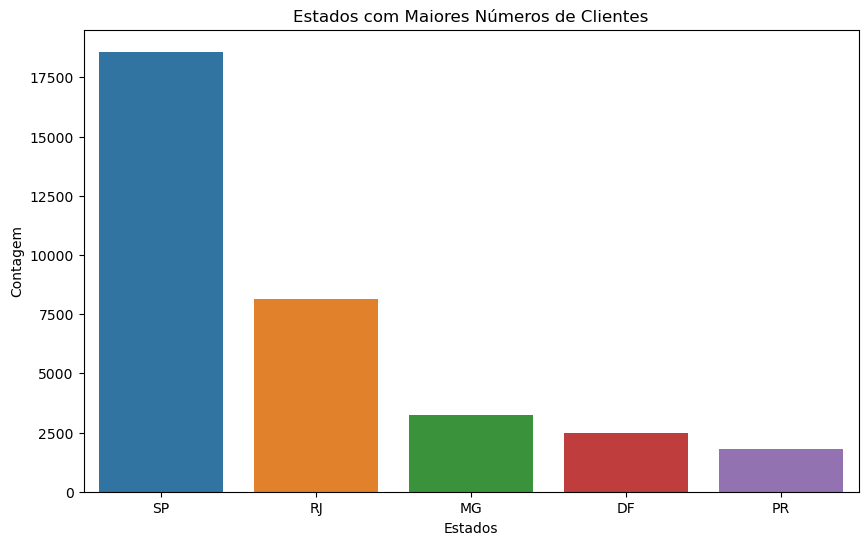

In [447]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias
sns.countplot(data = df_quantcliente,
              x = 'customer_state')

# definir texto do título e eixos x e y
plt.title('Estados com Maiores Números de Clientes')
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.show()

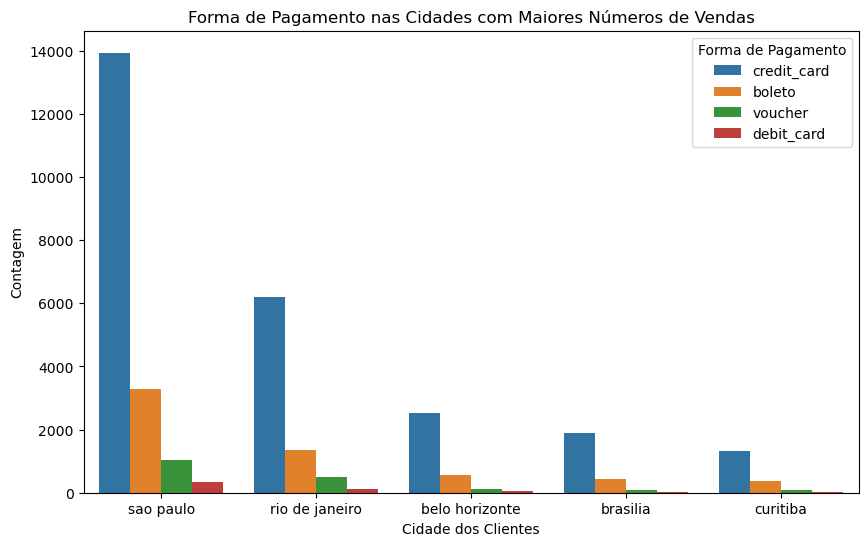

In [448]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos
# de plano com tonalidades das barras definidas pela faixa etária

sns.countplot(data = df_quantcliente,
              x = 'customer_city',
              hue = 'payment_type')

# definir texto do título e eixos x e y

plt.title('Forma de Pagamento nas Cidades com Maiores Números de Vendas')
plt.xlabel('Cidade dos Clientes')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Forma de Pagamento')

plt.show()

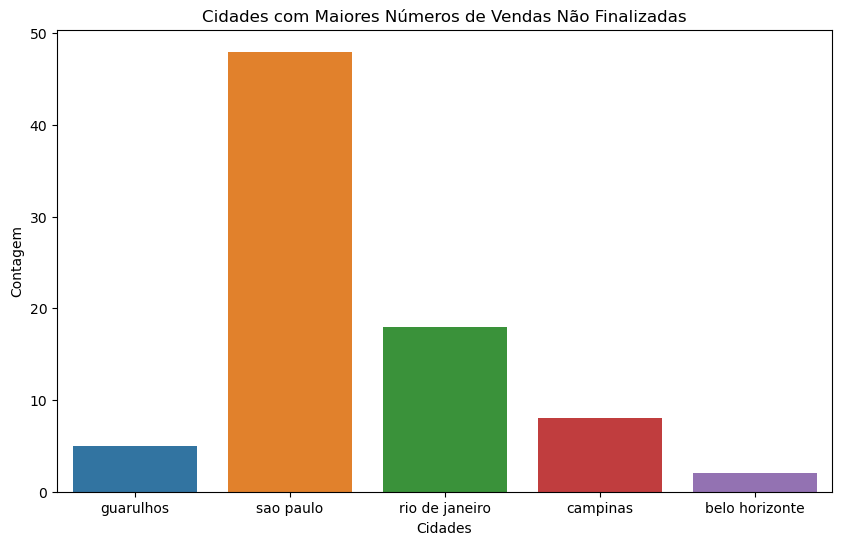

In [454]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias
sns.countplot(data = df_pedidosnaofinalizados,
              x = 'customer_city')

# definir texto do título e eixos x e y
plt.title('Cidades com Maiores Números de Vendas Não Finalizadas')
plt.xlabel('Cidades')
plt.ylabel('Contagem')
plt.show()

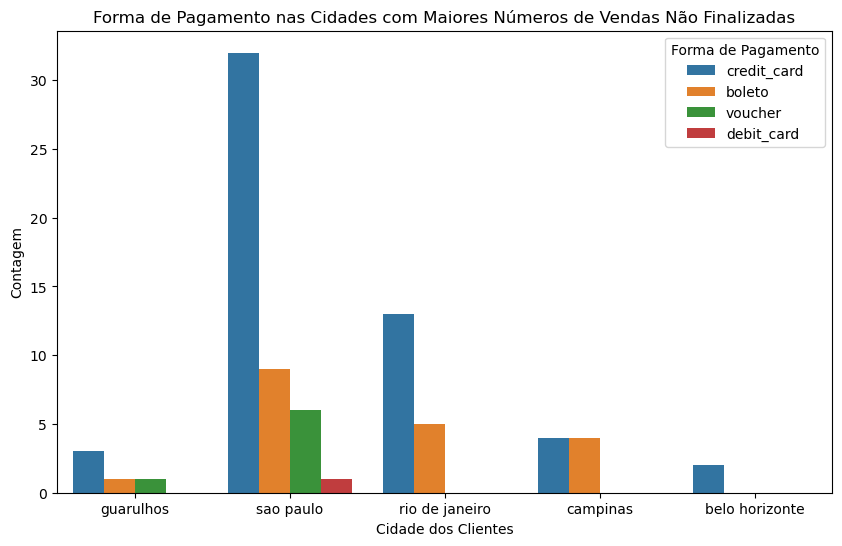

In [457]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos
# de plano com tonalidades das barras definidas pela faixa etária

sns.countplot(data = df_pedidosnaofinalizados,
              x = 'customer_city',
              hue = 'payment_type')

# definir texto do título e eixos x e y

plt.title('Forma de Pagamento nas Cidades com Maiores Números de Vendas Não Finalizadas')
plt.xlabel('Cidade dos Clientes')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Forma de Pagamento')

plt.show()

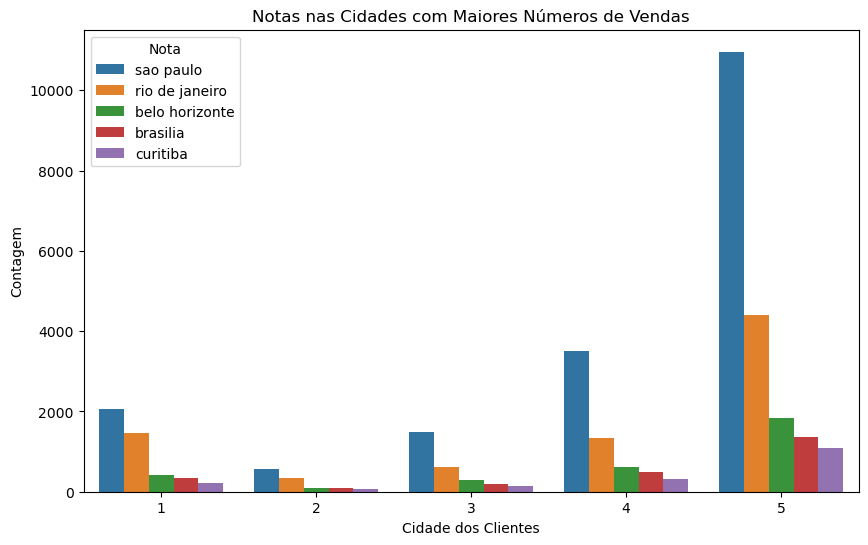

In [468]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos
# de plano com tonalidades das barras definidas pela faixa etária

sns.countplot(data = df_quantcliente,
              x = 'review_score',
              hue = 'customer_city')

# definir texto do título e eixos x e y

plt.title('Notas nas Cidades com Maiores Números de Vendas')
plt.xlabel('Cidade dos Clientes')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Nota')

plt.show()